In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
def read_image(img_path):
  img = Image.open(img_path)
  return np.array(img)

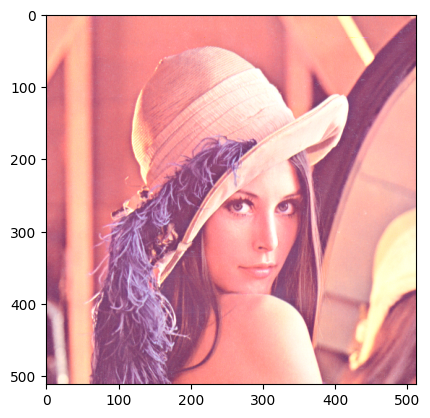

In [30]:
def brigthen_image(img, alpha=50):
  img = img + float(alpha)
  img = np.clip(img, 0, 255)
  return Image.fromarray(img.astype(np.uint8))

img = read_image('Lenna.png')
alpha = 50
new_img = brigthen_image(img)
plt.imshow(new_img)

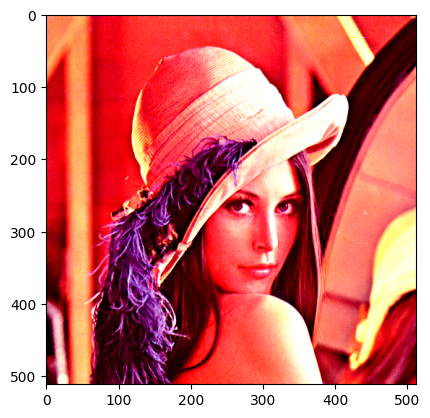

In [31]:
def adjust_contrast(img, alpha = 100):
    factor = (259 * (255 + alpha)) / (255 * (259 - alpha))
    img = float(factor) * img - factor * 128 + 128
    img = np.clip(img, 0, 255)
    return Image.fromarray(img.astype(np.uint8))

alpha = 100
img = read_image('Lenna.png')
new_img = adjust_contrast(img)
plt.imshow(new_img)

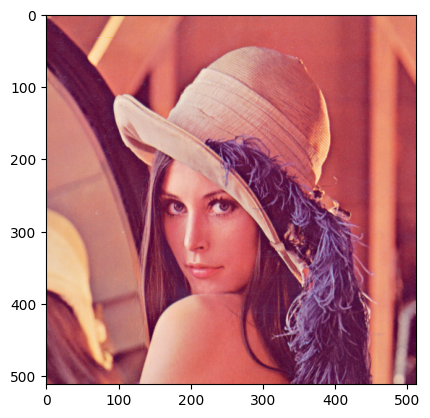

In [32]:
def flip(img, axis):
    axis = axis % img.ndim
    arr = [slice(None)] * img.ndim
    arr[axis] = slice(None, None, -1)
    new_im = img[tuple(arr)]

    return Image.fromarray(new_im)

image = read_image("Lenna.png")

flip_horizontally = flip(image, 1)
plt.imshow(flip_horizontally)

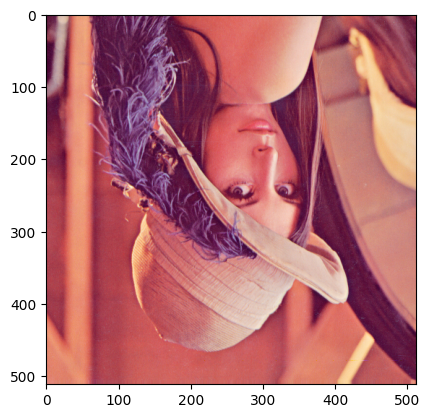

In [33]:
def flip(img, axis):
    axis = axis % img.ndim
    arr = [slice(None)] * img.ndim
    arr[axis] = slice(None, None, -1)
    new_im = img[tuple(arr)]
    return Image.fromarray(new_im)

image = read_image("Lenna.png")

flip_vertically = flip(image, 0)
plt.imshow(flip_vertically)

(512, 512)


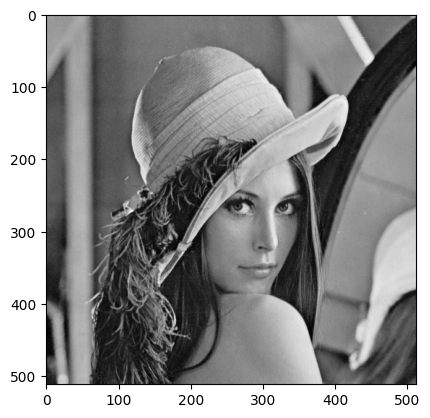

In [34]:
def to_grayscale(img):
    gray_matrix = np.array([0.3, 0.59, 0.11])
    img = img @ gray_matrix
    print(img.shape)
    return Image.fromarray(img.astype(np.uint8))

img = read_image('Lenna.png')    
img = to_grayscale(img)
plt.imshow(img, cmap='gray')

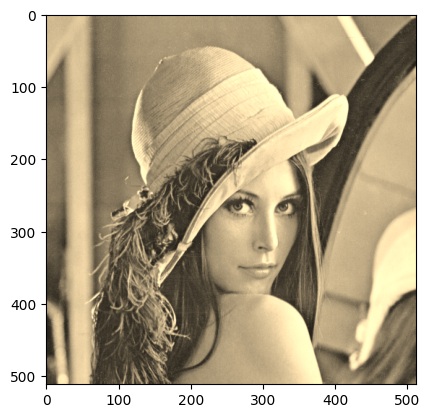

In [35]:
def to_sepia(img):
    sepia_matrix = np.array([[0.393, 0.349, 0.272], 
                             [0.769, 0.686, 0.534], 
                             [0.189, 0.168, 0.131]])
    sepia_img = img @ sepia_matrix
    sepia_img = np.clip(sepia_img, 0, 255)
    return Image.fromarray(sepia_img.astype(np.uint8))

img = read_image('Lenna.png')    
img = to_sepia(img)
plt.imshow(img)

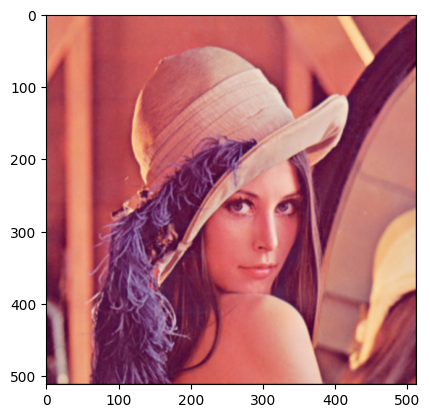

In [36]:
def blur_img(img):
    kernel = np.array([[[1], [2], [1]],
                        [[2], [4], [2]],
                       [[1], [2], [1]]]) /16.0
    
    pad = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
    pad[1:-1,1:-1,:] = img
    
    for col in range(0, img.shape[0]):
        for row in range(0, img.shape[1]):
            img[col][row] = (pad[col:col + 3, row: row + 3] * kernel).sum(axis = 1).sum(axis = 0)
            
    return Image.fromarray(img.astype(np.uint8))

image = read_image("Lenna.png")
blurred_im = blur_img(image)
#blurred_im.save("blur.jpg")
plt.imshow(blurred_im)


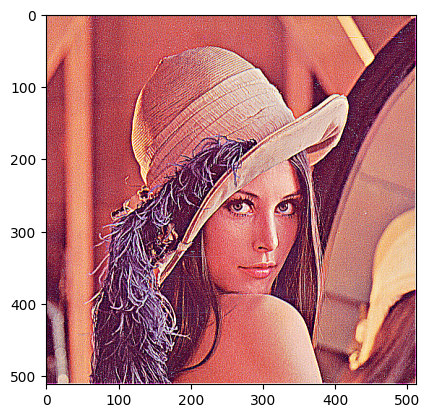

In [37]:

def sharpen_img(img):
    img = img / 255.0
    kernel = np.array([[[-1], [-1], [-1]],
                    [[-1], [9], [-1]],
                    [[-1], [-1], [-1]]])
    
    pad = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
    pad[1:-1,1:-1,:] = img
    
    for col in range(0, img.shape[0]):
        for row in range(0, img.shape[1]):
            img[col][row] = (pad[col: col + 3, row: row + 3] * kernel).sum(axis = 1).sum(axis = 0)
            
    img = img * 255.0
    return Image.fromarray(img.clip(0, 255).astype(np.uint8))

image = read_image("Lenna.png")
sharpen_im = sharpen_img(image)
#sharpen_im.save("sharpen.jpg")
plt.imshow(sharpen_im)


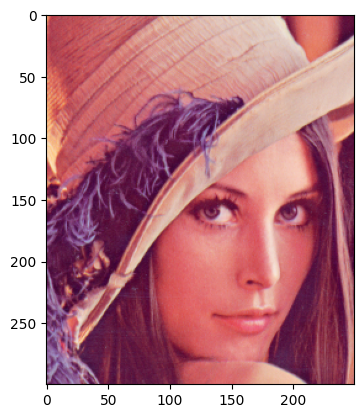

In [42]:
def crop_center(image, x = 250, y = 300):
    height = image.shape[0]
    width = image.shape[1]
    x_pos = width // 2 - (x // 2)
    y_pos = height // 2 - (y // 2)
    return Image.fromarray(image[y_pos:y_pos + y, x_pos:x_pos + x])

image = read_image('Lenna.png')
plt.imshow(crop_center(image))

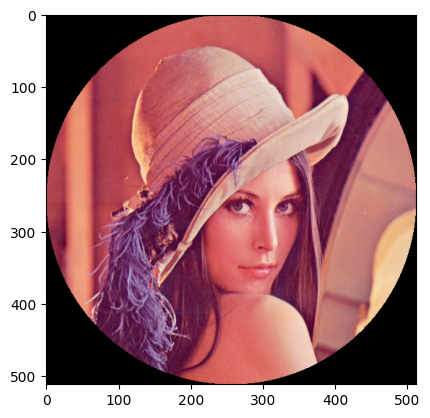

In [43]:
def create_circularMask(img):
    height = img.shape[0]
    width = img.shape[1]
    radius = min(width, height)//2
    center = (height//2, width//2)
    y, x = np.ogrid[:height, :width]
    circleMask = (x - center[1]) ** 2 + (y - center[0]) ** 2 <= radius ** 2
    return circleMask

image = read_image('Lenna.png')
mask = create_circularMask(image)
plt.imshow(Image.fromarray(image*mask[:, :, np.newaxis]))


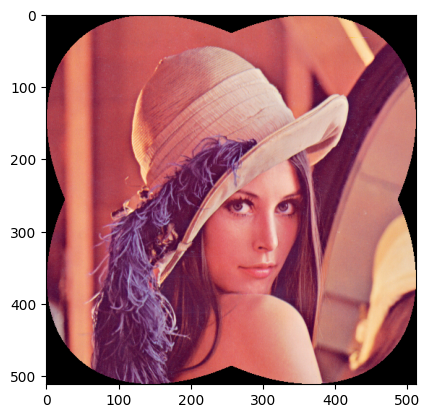

In [44]:

def create_ellipseMask(img, angle, a = 306, b = 192):
    height = img.shape[0]
    width = img.shape[1]
    center = (height//2, width//2)
    y, x = np.ogrid[:height, :width]

    new_x = (x - center[1]) * np.cos(angle) + (y - center[0]) * np.sin(angle)
    new_y = (x - center[1]) * np.sin(angle) - (y - center[0]) * np.cos(angle)

    ellipseMask = (new_x / a) ** 2 + (new_y / b) ** 2 <= 1
    return ellipseMask

image = read_image('Lenna.png')
first_mask = create_ellipseMask(image, np.pi/4)
second_mask = create_ellipseMask(image, -np.pi/4)
mask = first_mask + second_mask
plt.imshow(Image.fromarray(image*mask[:, :, np.newaxis]))



In [51]:
if __name__ == '__main__':
    image_path = str(input("Nhập đường dẫn ảnh: "))
    image_name = image_path.split(".")[0]
    image_format = image_path.split(".")[1]
    image_array = read_image(image_path)
    print("Chọn chức năng bạn muốn:")
    print("0. Thực hiện tất cả")
    print("1. Tăng độ sáng của ảnh")
    print("2. Thay đổi độ tương phản")
    print("3. Lật ảnh")
    print("4. Chuyển đổi ảnh RGB thành ảnh xám/sepia")
    print("5. Làm mờ/sắc nét ảnh")
    print("6. Cắt ảnh theo kích thước(cắt ở trung tâm)")
    print("7. Cắt ảnh theo khung tròn")
    print("8. Cắt ảnh theo khung bông hoa")
    choice = -1
    while choice > 8 or choice < 0 :
        choice = int(input("Nhập chức năng: "))
    if choice == 1:
        new_image = brigthen_image(image_array)
        new_image.save(image_name + "_brighten."+ image_format)
    elif choice == 2:
        new_image = adjust_contrast(image_array)
        new_image.save(image_name + "_contrast." + image_format)
    elif choice == 3:
        print("1. Lật ảnh ngang")
        print("2. Lật ảnh dọc")
        option = -1
        while option > 2 or option < 0:
            option = int(input("Nhập lựa chọn: "))
        
        if option == 1:
            new_image = flip(image_array, 0)
            new_image.save(image_name + "_flipHorizontally." + image_format)
        if option ==2:
            new_image = flip(image_array, 1)
            new_image.save(image_name + "_flipVertically." + image_format)
    elif choice == 4:
        print("1. Ảnh xám")
        print("2. Ảnh sepia")
        option = -1
        while option > 2 or option < 0:
            option = int(input("Nhập lựa chọn: "))
        
        if option == 1:
            new_image = to_grayscale(image_array)
            new_image.save(image_name + "_gray." + image_format)
        if option == 2:
            new_image = to_sepia(image_array)
            new_image.save(image_name + "_sepia." + image_format)

    elif choice == 5:
        print("1. Làm mờ ảnh")
        print("2. Làm sắc nét ảnh")
        option = -1
        while option > 2 or option < 0:
            option = int(input("Nhập lựa chọn: "))
        
        if option == 1:
            new_image = blur_img(image_array)
            new_image.save(image_name + "_blur." + image_format)
        if option == 2:
            new_image = sharpen_img(image_array)
            new_image.save(image_name + "_sharpen." + image_format)
    elif choice == 6:
        new_image = crop_center(image_array)
        new_image.save(image_name + "_crop." + image_format)
    elif choice == 7:
        mask = create_circularMask(image_array)
        new_image = Image.fromarray(image*mask[:, :, np.newaxis])
        new_image.save(image_name + "_circle." + image_format)
    elif choice == 8:
        first_mask = create_ellipseMask(image, np.pi / 4)
        second_mask = create_ellipseMask(image, -np.pi / 4) 
        mask = first_mask + second_mask
        new_image = Image.fromarray(image*mask[:, :, np.newaxis])
        new_image.save(image_name + "_ellipse." + image_format)
    
    elif choice == 0:
        new_image = brigthen_image(image_array)
        new_image.save(image_name + "_brighten."+ image_format)

        new_image = adjust_contrast(image_array)
        new_image.save(image_name + "_contrast." + image_format)

        new_image = flip(image_array, 0)
        new_image.save(image_name + "_flipHorizontally." + image_format)
        
        new_image = flip(image_array, 1)
        new_image.save(image_name + "_flipVertically." + image_format)

        new_image = to_grayscale(image_array)
        new_image.save(image_name + "_gray." + image_format)

        new_image = to_sepia(image_array)
        new_image.save(image_name + "_sepia." + image_format)

        new_image = blur_img(image_array)
        new_image.save(image_name + "_blur." + image_format)

        new_image = sharpen_img(image_array)
        new_image.save(image_name + "_sharpen." + image_format)

        new_image = crop_center(image_array)
        new_image.save(image_name + "_crop." + image_format)

        mask = create_circularMask(image_array)
        new_image = Image.fromarray(image*mask[:, :, np.newaxis])
        new_image.save(image_name + "_circle." + image_format)

        first_mask = create_ellipseMask(image, np.pi / 4)
        second_mask = create_ellipseMask(image, -np.pi / 4) 
        mask = first_mask + second_mask
        new_image = Image.fromarray(image*mask[:, :, np.newaxis])
        new_image.save(image_name + "_ellipse." + image_format)

Chọn chức năng bạn muốn:
0. Thực hiện tất cả
1. Tăng độ sáng của ảnh
2. Thay đổi độ tương phản
3. Lật ảnh
4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
5. Làm mờ/sắc nét ảnh
6. Cắt ảnh theo kích thước(cắt ở trung tâm)
7. Cắt ảnh theo khung tròn
8. Cắt ảnh theo khung bông hoa
